## 6.1 参数的更新

### 6.1.2 SGD

In [1]:
import numpy as np


class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]


### 6.1.4 Momentum

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
        

## 6.2 权重的初始值

### 6.2.2 隐藏层的激活值的分布

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.1
    w = np.random.randn(node_num, node_num) * np.sqrt(1 / node_num)
    
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

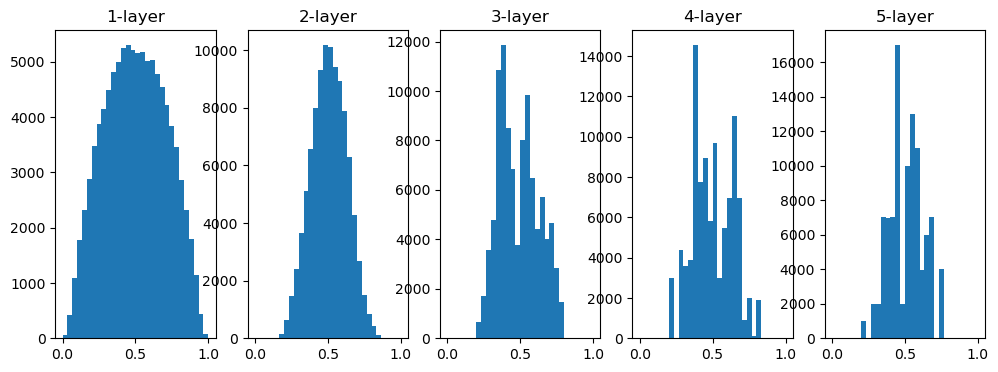

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))  # 创建包含 4 个子图的 Figure 对象和 Axes 对象数组

for i, a in activations.items():
    ax = axes[i]  # 获取当前循环迭代的 Axes 对象
    ax.set_title(str(i+1) + "-layer")  # 设置子图标题
    ax.hist(a.flatten(), 30, range=(0, 1))  # 绘制直方图

plt.show()

## 6.3 Batch Normalization

这部分没有代码

## 6.4 正则化

### 6.4.1 过拟合

In [7]:
import sys, os
sys.path.append(os.pardir)

In [8]:
import numpy as np
from dataset.dataset import load_mnist
from common.multi_layer_net import MultiLayerNet

In [ ]:
(x_train, t_train, x_test, t_test) = load_mnist(normalize=TRUE)

# 减少学习数据以出现过拟合
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10)

optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(10000):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
      break


### 6.4.3 Dropout

In [10]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None
  
  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
  
  def backward(self, dout):
    return dout * self.mask
  

## 6.5 超参数的验证

### 6.5.1 验证数据

In [11]:
from common.util import shuffle_dataset 

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 打乱数据
x_train, t_train = shuffle_dataset(x_train, t_train)

# 分割数据
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]